In [38]:
import pandas as pd
import numpy as np

In [40]:
df=pd.read_csv("perfect_customer_segmentation_data.csv")
df

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,C1000,18,20000.000000,1,6000.000000,0,0
1,C1001,18,20260.521042,1,6078.156313,0,0
2,C1002,18,20521.042084,1,6156.312625,0,0
3,C1003,18,20781.563126,1,6234.468938,0,0
4,C1004,18,21042.084168,1,6312.625251,0,0
...,...,...,...,...,...,...,...
495,C1495,74,148957.915832,4,44687.374749,5,2
496,C1496,74,149218.436874,4,44765.531062,5,2
497,C1497,74,149478.957916,4,44843.687375,5,2
498,C1498,74,149739.478958,4,44921.843687,5,2


In [42]:
df.isnull().sum().sum()

0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         500 non-null    object 
 1   Age                 500 non-null    int64  
 2   Annual_Income       500 non-null    float64
 3   Policy_Count        500 non-null    int64  
 4   Total_Premium_Paid  500 non-null    float64
 5   Claim_Frequency     500 non-null    int64  
 6   Policy_Upgrades     500 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 27.5+ KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,46.002,16.508757,18.0,32.0,46.0,60.0,75.0
Annual_Income,500.0,85000.000,37640.557635,20000.0,52500.0,85000.0,117500.0,150000.0
Policy_Count,500.0,2.536,1.218060,1.0,2.0,2.0,4.0,4.0
Total_Premium_Paid,500.0,25500.000,11292.167290,6000.0,15750.0,25500.0,35250.0,45000.0
Claim_Frequency,500.0,2.890,2.001477,0.0,2.0,2.0,5.0,5.0
Policy_Upgrades,500.0,1.152,0.770769,0.0,1.0,1.0,2.0,2.0


In [50]:
df=df.drop(columns=['Customer_ID'])
df

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,18,20000.000000,1,6000.000000,0,0
1,18,20260.521042,1,6078.156313,0,0
2,18,20521.042084,1,6156.312625,0,0
3,18,20781.563126,1,6234.468938,0,0
4,18,21042.084168,1,6312.625251,0,0
...,...,...,...,...,...,...
495,74,148957.915832,4,44687.374749,5,2
496,74,149218.436874,4,44765.531062,5,2
497,74,149478.957916,4,44843.687375,5,2
498,74,149739.478958,4,44921.843687,5,2


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [54]:
scaler=StandardScaler()
scaled_feature=scaler.fit_transform(df)

In [56]:
pca=PCA(n_components=2)
pca_feature=pca.fit_transform(scaled_feature)

In [58]:
kmeans = KMeans(n_clusters=3, n_init=10,random_state=42)  
df["Kmeans_Cluster"] = kmeans.fit_predict(scaled_feature)


C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [60]:
df.sample(10)

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster
111,30,48917.835671,1,14675.350701,2,0,2
396,63,123166.332665,4,36949.899800,5,2,1
270,48,90340.681363,2,27102.204409,2,1,0
305,52,99458.917836,2,29837.675351,5,1,0
327,55,105190.380762,4,31557.114228,5,2,1
250,46,85130.260521,2,25539.078156,2,1,0
329,55,105711.422846,4,31713.426854,5,2,1
444,68,135671.342685,4,40701.402806,5,2,1
348,57,110661.322645,4,33198.396794,5,2,1
103,29,46833.667335,1,14050.100200,0,0,2


In [62]:
def assign_segment(cluster):
    if cluster == 0:
        return "Young Professionals"  
    elif cluster == 1:
        return "High-Risk Customers"  
    elif cluster == 2:
        return "Low-Risk Policyholders"  
df["Customer_Segment"] = df["Kmeans_Cluster"].apply(assign_segment)
df.to_csv("customer_segmentation_labeled.csv", index=False)
print("Labeled dataset saved successfully!")

Labeled dataset saved successfully!


In [64]:
df.sample(10)

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster,Customer_Segment
321,54,103627.254509,4,31088.176353,5,2,1,High-Risk Customers
106,30,47615.230461,1,14284.569138,2,0,2,Low-Risk Policyholders
431,67,132284.569138,4,39685.370741,5,2,1,High-Risk Customers
193,40,70280.561122,2,21084.168337,2,1,0,Young Professionals
477,72,144268.537074,4,43280.561122,5,2,1,High-Risk Customers
409,64,126553.106212,4,37965.931864,5,2,1,High-Risk Customers
171,37,64549.098196,2,19364.729459,2,1,0,Young Professionals
220,43,77314.629259,2,23194.388778,2,1,0,Young Professionals
126,32,52825.651303,2,15847.695391,2,1,0,Young Professionals
266,48,89298.597194,2,26789.579158,2,1,0,Young Professionals


In [66]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_feature, df["Kmeans_Cluster"])
print("Silhouette Score:", silhouette_avg)

from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_feature, df["Kmeans_Cluster"])
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.7135164343225008
Davies-Bouldin Index: 0.4106641592573215


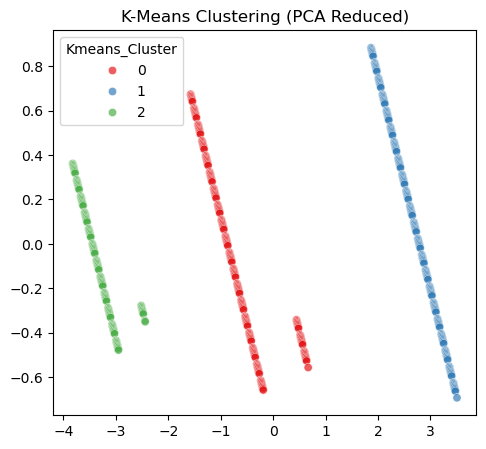

In [68]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_feature[:, 0], y=pca_feature[:, 1], hue=df["Kmeans_Cluster"], palette="Set1", alpha=0.7)
plt.title("K-Means Clustering (PCA Reduced)")
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Annual_Income       500 non-null    float64
 2   Policy_Count        500 non-null    int64  
 3   Total_Premium_Paid  500 non-null    float64
 4   Claim_Frequency     500 non-null    int64  
 5   Policy_Upgrades     500 non-null    int64  
 6   Kmeans_Cluster      500 non-null    int32  
 7   Customer_Segment    500 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 29.4+ KB


In [72]:
x=df[['Policy_Count','Claim_Frequency','Policy_Upgrades','Kmeans_Cluster']]

In [76]:
x

,Policy_Count,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster
0,1,0,0,2
1,1,0,0,2
2,1,0,0,2
3,1,0,0,2
4,1,0,0,2
...,...,...,...,...
495,4,5,2,1
496,4,5,2,1
497,4,5,2,1
498,4,5,2,1


In [78]:
y=df[['Customer_Segment']]

In [82]:
y

,Customer_Segment
0,Low-Risk Policyholders
1,Low-Risk Policyholders
2,Low-Risk Policyholders
3,Low-Risk Policyholders
4,Low-Risk Policyholders
...,...
495,High-Risk Customers
496,High-Risk Customers
497,High-Risk Customers
498,High-Risk Customers


In [84]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,train_size=0.8)

In [86]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [88]:
ypred = model.predict(x_test)
from sklearn.metrics import classification_report
fullreport = classification_report(ypred,y_test)

print(fullreport)

                        precision    recall  f1-score   support

   High-Risk Customers       1.00      1.00      1.00        47
Low-Risk Policyholders       1.00      1.00      1.00        30
   Young Professionals       1.00      1.00      1.00        23

              accuracy                           1.00       100
             macro avg       1.00      1.00      1.00       100
          weighted avg       1.00      1.00      1.00       100



In [90]:
x

,Policy_Count,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster
0,1,0,0,2
1,1,0,0,2
2,1,0,0,2
3,1,0,0,2
4,1,0,0,2
...,...,...,...,...
495,4,5,2,1
496,4,5,2,1
497,4,5,2,1
498,4,5,2,1


In [110]:
import numpy as np
inputdata=(1,0,0,0)
inputdataarray=np.asarray(inputdata)
inputdatareshape=inputdataarray.reshape(1,-1)
prediction=model.predict(inputdatareshape)
print("\n🧠 Predicted Customer Segment:", *prediction)


🧠 Predicted Customer Segment: Young Professionals


C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [112]:
import pickle
with open('customersegmentation.pkl','wb')as file:
    pickle.dump(model,file)